In [2]:
import pandas as pd
from pandasql import sqldf
import matplotlib.pyplot as plt
import seaborn as sns

# Data Load

In [4]:
data1 = pd.read_csv("athlete_events1.csv")
data1.head(n=2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN


In [5]:
data2 = pd.read_csv("country_definitions2.csv")
data2.head(n=2)

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles


In [6]:
data = data1.merge(data2, on = 'NOC')
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,602,Abudoureheman,M,22.0,182.0,75.0,China,CHN,2000 Summer,2000,Summer,Sydney,Boxing,Boxing Men's Middleweight,NaN,China,NaN
3,1463,Ai Linuer,M,25.0,160.0,62.0,China,CHN,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Men's Lightweight, Greco-Roman",NaN,China,NaN
4,1464,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 200 metres Freestyle,NaN,China,NaN


# Data Understanding

In [7]:
data = data.drop(columns = 'notes', inplace = False)
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China
2,602,Abudoureheman,M,22.0,182.0,75.0,China,CHN,2000 Summer,2000,Summer,Sydney,Boxing,Boxing Men's Middleweight,NaN,China
3,1463,Ai Linuer,M,25.0,160.0,62.0,China,CHN,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Men's Lightweight, Greco-Roman",NaN,China
4,1464,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 200 metres Freestyle,NaN,China


In [8]:
data.describe()

,ID,Age,Height,Weight,Year
count,270767.000000,261305.000000,210684.000000,207982.000000,270767.000000
mean,68229.276832,25.559783,175.344250,70.709523,1978.362297
std,39017.998824,6.392501,10.519556,14.350094,29.884637
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34630.500000,21.000000,168.000000,60.000000,1960.000000
50%,68187.000000,24.000000,175.000000,70.000000,1988.000000
75%,102065.500000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 270767 entries, 0 to 270766
Data columns (total 16 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      270767 non-null  int64  
 1   Name    270767 non-null  object 
 2   Sex     270767 non-null  object 
 3   Age     261305 non-null  float64
 4   Height  210684 non-null  float64
 5   Weight  207982 non-null  float64
 6   Team    270767 non-null  object 
 7   NOC     270767 non-null  object 
 8   Games   270767 non-null  object 
 9   Year    270767 non-null  int64  
 10  Season  270767 non-null  object 
 11  City    270767 non-null  object 
 12  Sport   270767 non-null  object 
 13  Event   270767 non-null  object 
 14  Medal   39774 non-null   object 
 15  region  270746 non-null  object 
dtypes: float64(3), int64(2), object(11)
memory usage: 35.1+ MB


In [10]:
data.isnull().sum()

ID             0
Name           0
Sex            0
Age         9462
Height     60083
Weight     62785
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     230993
region        21
dtype: int64

# Data Cleaning

In [11]:
#  Replace the NAN value of AGe with the Mean Value

data['Age'] = data['Age'].fillna(data['Age'].mean())
data['Height'] = data['Height'].fillna(data['Height'].mean())
data['Weight'] = data['Weight'].fillna(data['Weight'].mean())
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China
2,602,Abudoureheman,M,22.0,182.0,75.0,China,CHN,2000 Summer,2000,Summer,Sydney,Boxing,Boxing Men's Middleweight,NaN,China
3,1463,Ai Linuer,M,25.0,160.0,62.0,China,CHN,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Men's Lightweight, Greco-Roman",NaN,China
4,1464,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 200 metres Freestyle,NaN,China


In [12]:
data.region = data.region.fillna('Unknown')
data.Medal = data.Medal.fillna('No Medal')

In [13]:
# check with the pandasql library, is the nan value of Age is replace or not.
q = "SELECT * FROM data WHERE Name = 'Georgi Abadzhiev'"
sqldf(q, globals())

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region
0,58,Georgi Abadzhiev,M,25.559783,175.34425,70.709523,Bulgaria,BUL,1924 Summer,1924,Summer,Paris,Cycling,"Cycling Men's Road Race, Individual",No Medal,Bulgaria
1,58,Georgi Abadzhiev,M,25.559783,175.34425,70.709523,Bulgaria,BUL,1924 Summer,1924,Summer,Paris,Cycling,"Cycling Men's Road Race, Team",No Medal,Bulgaria


In [14]:
# But there are some dupticate value.
# Drop those all dupicate values using their ID and Name. 

data.drop_duplicates(subset = ["ID", "Name"], inplace = True)
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No Medal,China
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No Medal,China
2,602,Abudoureheman,M,22.0,182.0,75.0,China,CHN,2000 Summer,2000,Summer,Sydney,Boxing,Boxing Men's Middleweight,No Medal,China
3,1463,Ai Linuer,M,25.0,160.0,62.0,China,CHN,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Men's Lightweight, Greco-Roman",No Medal,China
4,1464,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 200 metres Freestyle,No Medal,China


In [15]:
# Check is there are any Null Value is Present or Not
data.isnull().sum()

ID        0
Name      0
Sex       0
Age       0
Height    0
Weight    0
Team      0
NOC       0
Games     0
Year      0
Season    0
City      0
Sport     0
Event     0
Medal     0
region    0
dtype: int64

# Data Processing 

In [16]:
query1 = "SELECT COUNT(Sex) Sex FROM data WHERE Sex = 'M' GROUP BY Sex"
query2 = "SELECT COUNT(Sex) Sex FROM data WHERE Sex = 'F' GROUP BY Sex"
query1 = sqldf(query1, globals())
query2 = sqldf(query2, globals())

In [36]:
query1 = query1.rename (columns = {'Sex' : 'male'})
query2 = query2.rename (columns = {'Sex' : 'female'})

In [19]:
query = query1.merge(query2, right_index = True, left_index = True)
query

,male,female
0,101477,33927


In [20]:
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No Medal,China
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No Medal,China
2,602,Abudoureheman,M,22.0,182.0,75.0,China,CHN,2000 Summer,2000,Summer,Sydney,Boxing,Boxing Men's Middleweight,No Medal,China
3,1463,Ai Linuer,M,25.0,160.0,62.0,China,CHN,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Men's Lightweight, Greco-Roman",No Medal,China
4,1464,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 200 metres Freestyle,No Medal,China


In [42]:
medal_gold = "SELECT COUNT(Medal) FROM data WHERE Medal = 'Silver' GROUP BY Medal"
medal_silver = "SELECT COUNT(Medal) FROM data WHERE Medal = 'Bronze' GROUP BY Medal"
medal_bronze = "SELECT COUNT(Medal) FROM data WHERE Medal = 'Bronze' GROUP BY Medal"
medal_no_medal = "SELECT COUNT(Medal) FROM data WHERE Medal = 'No Medal' GROUP BY Medal"
medal_gold = sqldf(medal_gold, globals())
medal_silver = sqldf(medal_silver, globals())
medal_bronze = sqldf(medal_bronze, globals())
medal_no_medal = sqldf(medal_no_medal, globals())

In [43]:
medal_gold = medal_gold.rename (columns = {'COUNT(Medal)' : 'Gold'})
medal_silver = medal_silver.rename (columns = {'COUNT(Medal)' : 'Silver'})
medal_bronze = medal_bronze.rename (columns = {'COUNT(Medal)' : 'Bronze'})
medal_no_medal = medal_no_medal.rename (columns = {'COUNT(Medal)' : 'No Medal'})

In [50]:
count_medal = medal_gold.merge(medal_silver, right_index = True, left_index = True)
count_medal = count_medal.merge(medal_bronze, right_index = True, left_index = True)
count_medal = count_medal.merge(medal_no_medal, right_index = True, left_index = True)

# Data Visualization

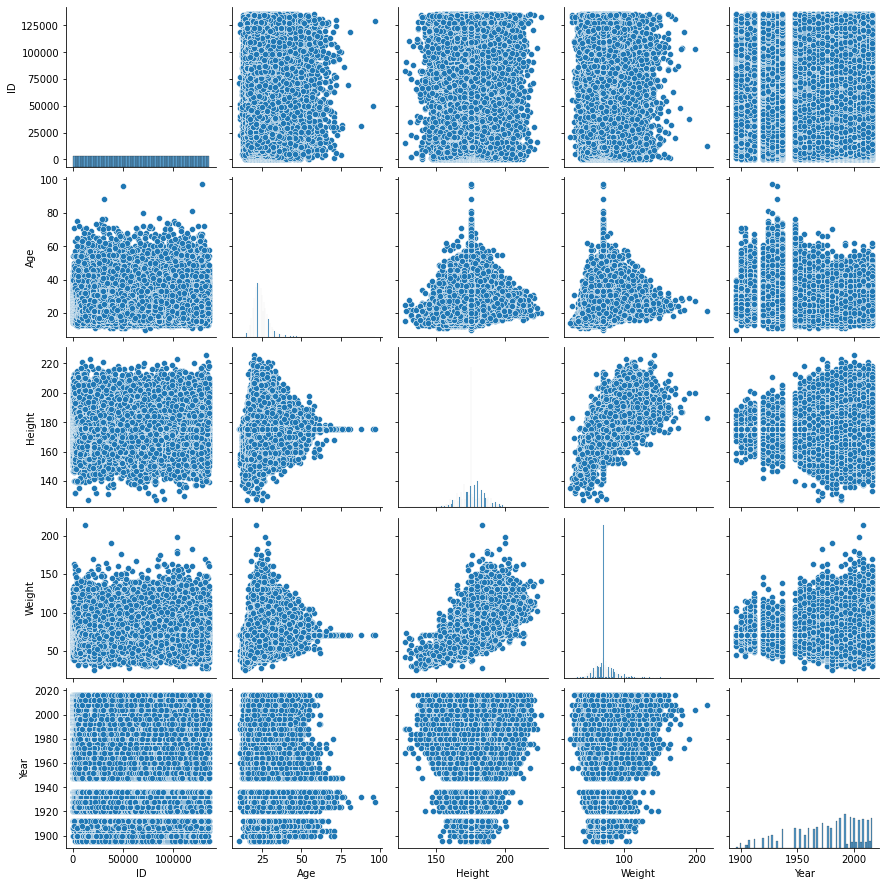

In [16]:
sns.pairplot(data)

plt.show()

In [17]:
# Convert the dataframe into excel file.
data.to_excel("output.xlsx")
print("File saved")

File saved


In [64]:
query.to_excel("count.xlsx")
print("File saved")

File saved


In [52]:
count_medal.to_excel("count_medal.xlsx")
print("File Saved..")

File Saved..
